In [1]:
from fastai.vision.all import *
import os

In [2]:
path = Path ('/home/hue/Data/codes/carvansara/dataset/carvansara_dataset')

In [3]:
dls = ImageDataLoaders.from_folder(path,
#                                    seed=75,
                                   train='train',
                                   valid='valid',
                                   bs=8,
                                   item_tfms=Resize(128),
                                   batch_tfms=aug_transforms(max_rotate=75,
                                                             max_lighting=0.4,
                                                             max_warp=0.05,
                                                             flip_vert=True)
                                  )

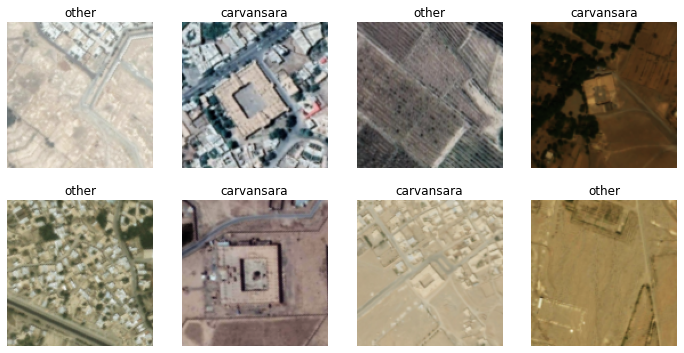

In [4]:
dls.train.show_batch()

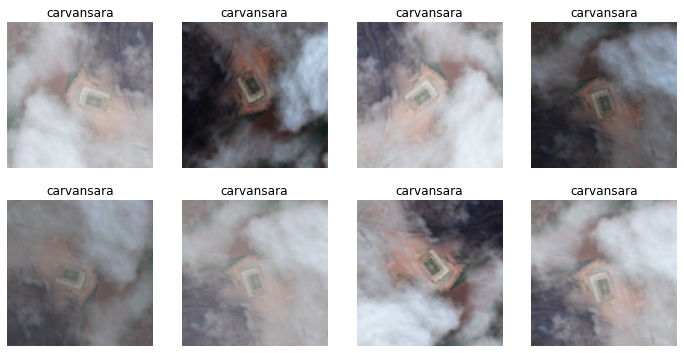

In [5]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [6]:
learn = cnn_learner(dls, resnet50, metrics={error_rate, accuracy})

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/hue/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
# learn = cnn_learner(dls, xresnet152, metrics={error_rate, accuracy})

In [ ]:
# learn.load("/content/gdrive/MyDrive/AI-ML/datasets/carvansara")

In [ ]:
# lr_min,lr_steep = learn.lr_find()

In [ ]:
# print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
# learn.freeze()

In [ ]:
# learn.freeze_to(-2)

In [7]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.229508,1.272380,0.395122,0.604878,00:22


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.906335,3.373261,0.517073,0.482927,00:31
1,0.608776,1.379181,0.253659,0.746341,00:29
2,0.518041,0.720204,0.253659,0.746341,00:30
3,0.367320,0.361178,0.170732,0.829268,00:30
4,0.319363,0.392627,0.200000,0.800000,00:30


In [ ]:
learn.save("carvansara_resnet18")

In [8]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(3, lr_max=slice(1e-9,1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time


In [ ]:
learn.save("carvansara_resnet18_ft")

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(8)

In [ ]:
TruePositives = 56
FalsePositives = 12
FalseNegatives = 14

In [ ]:
Precision = TruePositives / (TruePositives + FalsePositives)

In [ ]:
Recall = TruePositives / (TruePositives + FalseNegatives)

In [ ]:
Precision

In [ ]:
Recall